## 0. Setup

In [1]:
# Import dependencies
import torch
import torch.nn as nn
from plot_lib import set_default, show_scatterplot, plot_bases, plot_data
from matplotlib.pyplot import plot, title, axis
from matplotlib import pyplot as plt
from IPython import display
import numpy as np

In [2]:
# Set style (needs to be in a new cell)
set_default()

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
# Set up your device 
cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if cuda else "cpu")

In [5]:
# Set up random seed to 1008. Do not change the random seed.
seed = 1008
torch.manual_seed(seed)
if cuda:
    torch.cuda.manual_seed_all(seed)

## 1. Data generation
#### You'll be creating data points that are generated from a particular function.

### 1.1 Quadratic: $y = f(x) = x^2$

In [6]:
# Implement the function below
def quadratic_data_generator(n_samples):
    """
    Generate: 
    1) tensor x of size (n_samples, 1) 
    with values uniformly distributed in the interval (-1, 1] 
    using torch.rand()
    2) tensor y of size (n_samples, 1) 
    equal to x^2 using torch.pow() 
    
    The function should return: x, y
    """
    # rand generates a number in [0, 1)
    # Rescale it to have samples in (-1, 1]
    x = -2 * torch.rand(n_samples, 1) + 1
    y = torch.pow(x, 2)
    return x.to(device), y.to(device)

In [7]:
# Generate the data with n_samples = 128
n_samples = 128
x_quadr, y_quadr = quadratic_data_generator(n_samples)
print(x_quadr.shape, y_quadr.shape)

torch.Size([128, 1]) torch.Size([128, 1])


In [8]:
def xy_concat(X, y):
    X_flat = X.view(X.numel())
    y_flat = y.view(y.numel())
    xy_flat = torch.zeros(X_flat.shape[0], 2)
    xy_flat[:, 0] = X_flat.data.cpu()
    xy_flat[:, 1] = y_flat.data.cpu()
    return xy_flat

In [9]:
# Visualize the data

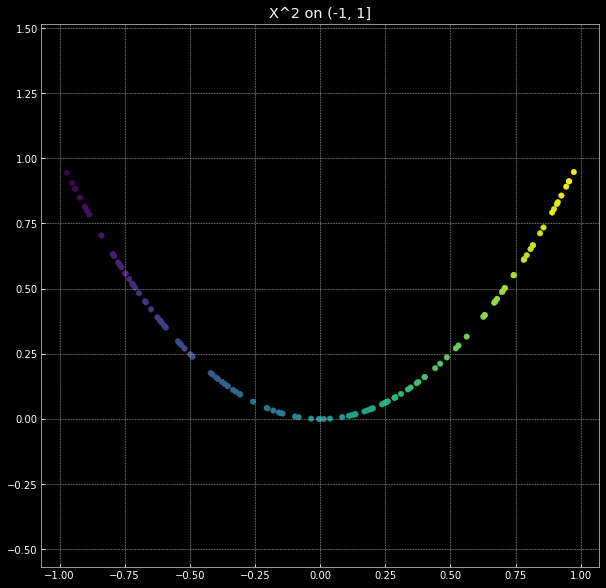

In [10]:
colors = x_quadr[:, 0]
show_scatterplot(xy_concat(x_quadr, y_quadr), colors, title='X^2 on (-1, 1]')

### 1.2 Cubic: $y = f(x) = x^3 - 0.5x$

In [11]:
# Implement the function below
def cubic_data_generator(n_samples):
    """
    Generate: 
    1) tensor x of size (n_samples, 1) 
    with values uniformly distributed in the interval (-1, 1] 
    using torch.rand()
    2) tensor y of size (n_samples, 1) 
    equal to (x^3 - 0.5x) using torch.pow() and torch.mul() 
    
    The function should return: x, y
    """
    # rand generates a number in [0, 1)
    # Rescale it to have samples in (-1, 1]
    x = -2 * torch.rand(n_samples, 1) + 1
    y = torch.pow(x, 3) + torch.mul(x, -0.5)
    return x.to(device), y.to(device)

In [12]:
# Generate the data with n_samples = 128
x_cubic, y_cubic = cubic_data_generator(n_samples)

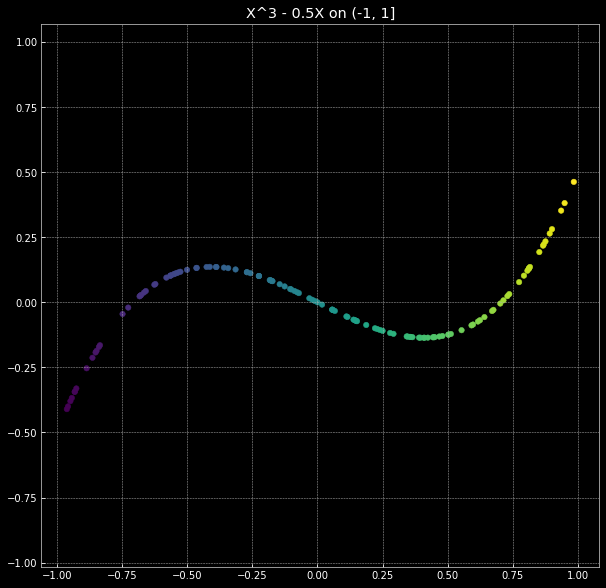

In [13]:
# Visualize the data 
colors = x_cubic[:, 0]
show_scatterplot(xy_concat(x_cubic, y_cubic), colors, title='X^3 - 0.5X on (-1, 1]')

### 1.3 Sine: $y = f(x) = \sin(2.5x)$

In [14]:
# Implement the function below
def sine_data_generator(n_samples):
    """
    Generate: 
    1) tensor x of size (n_samples, 1) 
    with values uniformly distributed in the interval (-1, 1] 
    using torch.rand()
    2) tensor y of size (n_samples, 1) 
    equal to sin(2.5 * x) using torch.sin() 
    
    The function should return: x, y
    """
    # rand generates a number in [0, 1)
    # Rescale it to have samples in (-1, 1]
    x = -2 * torch.rand(n_samples, 1) + 1
    y = torch.sin(torch.mul(x, 2.5))
    return x.to(device), y.to(device)

In [15]:
# Generate the data with n_samples = 128
x_sine, y_sine = sine_data_generator(n_samples)

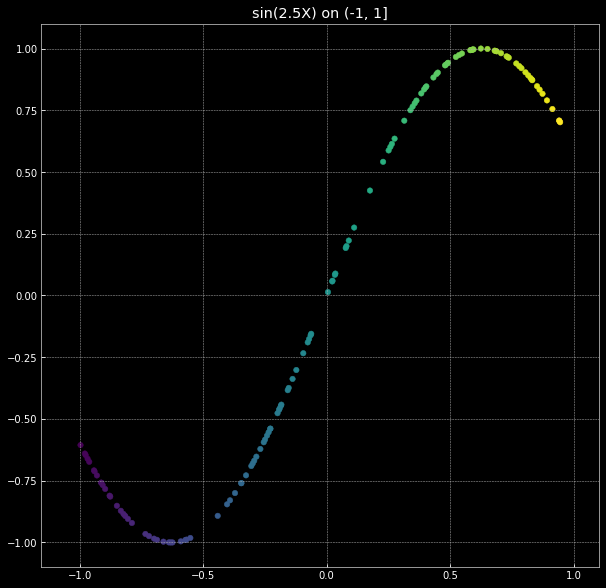

In [16]:
# Visualize the data 
colors = x_sine[:, 0]
show_scatterplot(xy_concat(x_sine, y_sine), colors, title='sin(2.5X) on (-1, 1]')

### 1.4 Absolute value: $y = f(x) = |x|$

In [17]:
# Implement the function below
def abs_data_generator(n_samples):
    """
    Generate: 
    1) tensor x of size (n_samples, 1) 
    with values uniformly distributed in the interval (-1, 1] 
    using torch.rand()
    2) tensor y of size (n_samples, 1) 
    equal to |x| using torch.abs() 
    
    The function should return: x, y
    """
    # rand generates a number in [0, 1)
    # Rescale it to have samples in (-1, 1]
    x = -2 * torch.rand(n_samples, 1) + 1
    y = torch.abs(x)
    return x.to(device), y.to(device)

In [18]:
# Generate the data with n_samples = 128
x_abs, y_abs = abs_data_generator(n_samples)

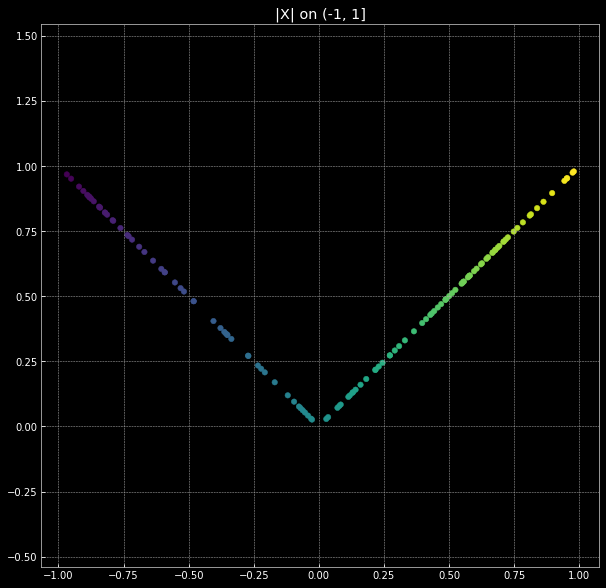

In [19]:
# Visualize the data 
colors = x_abs[:, 0]
show_scatterplot(xy_concat(x_abs, y_abs), colors, title='|X| on (-1, 1]')

### 1.5 Heavyside Step Function: $y = f(x) = \begin{cases} 0, & x < 0 \\ 1, & x \geq 0 \end{cases}$

In [20]:
# Implement the function below
def hs_data_generator(n_samples):
    """
    Generate: 
    1) tensor x of size (n_samples, 1) 
    with values uniformly distributed in the interval (-1, 1] 
    using torch.rand()
    2) tensor y of size (n_samples, 1) 
    equal to the Heavyside Step Function using a condition.
    Make sure that y is a torch.FloatTensor.
    
    The function should return: x, y
    """
    # rand generates a number in [0, 1)
    # Rescale it to have samples in (-1, 1]
    x = -2 * torch.rand(n_samples, 1) + 1
    y = torch.zeros_like(x)
    y[x < 0.0] = 0.0
    y[x >= 0.0] = 1
    return x.to(device), y.to(device)

In [21]:
# Generate the data with n_samples = 128
x_hs, y_hs = hs_data_generator(n_samples)

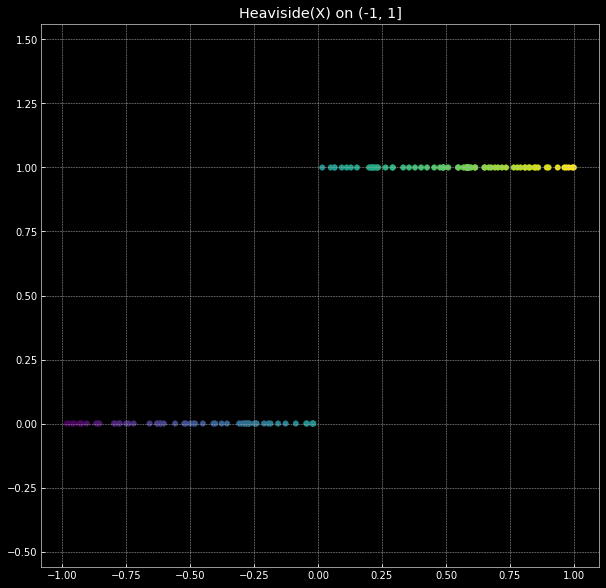

In [22]:
# Visualize the data 
colors = x_hs[:, 0]
show_scatterplot(xy_concat(x_hs, y_hs), colors, title='Heaviside(X) on (-1, 1]')

## 2. Models
#### You are going to approximate the functions above with fully connected models of different depths.  

### 2.1. Dimensionality
The models you define below will be predicting $y$ from $x$ and will use the data generated in Part 1 as training data. Fill in the input and output dimensions for each of the models.

Hint: These dimensions are independent from the number of samples. 

In [23]:
input_dim = 1
output_dim = 1

### 2.2. No Hidden 
Define a model with a single linear module `torch.nn.Linear(input_dim, output_dim)` and no non-linearity.

In [24]:
class Linear_0H(nn.Module):
    def __init__(self):
        super(Linear_0H, self).__init__()
        
        # Layers: 1 input
        self.fc = torch.nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.fc(x)

### 2.2. One Hidden 
Define a model with a single hidden layer of size 3 and one ReLU non-linearity.
Use `nn.Sequential()` for defining the layers.

Hint: Architecture should be `nn.Linear(intput_dim, 3)` -> `nn.ReLU()` -> `nn.Linear(3, output_dim)`

In [25]:
n_hidden = 3

In [26]:
class Linear_1H(nn.Module):
    def __init__(self):
        super(Linear_1H, self).__init__()
        
        # Layers: 1 input layer and 2 hidden layers, 1 ReLU
        self.network = nn.Sequential(
            nn.Linear(input_dim, n_hidden), 
            nn.ReLU(), 
            nn.Linear(n_hidden, output_dim)
        )

    def forward(self, x):
        return self.network(x)

### 2.3. Two Hidden 
Define a model with a two hidden layers of size 3 and two ReLU non-linearities.
Use `nn.Sequential()` for defining the layers.

Hint: Architecture should be `nn.Linear(input_dim,3)` -> `nn.ReLU()` -> `nn.Linear(3,3)` -> `nn.ReLU()` -> `nn.Linear(3, output_dim)`

In [27]:
class Linear_2H(nn.Module):
    def __init__(self):
        super(Linear_2H, self).__init__()
        
        # Layers: 1 input, 2 hidden layers and two ReLUs
        self.network = nn.Sequential(
            nn.Linear(input_dim, n_hidden), 
            nn.ReLU(), 
            nn.Linear(n_hidden, n_hidden),
            nn.ReLU(), 
            nn.Linear(n_hidden, output_dim)
        )


    def forward(self, x):
        return self.network(x)

## 3. Training

### 3.1 Train method
You are going to implement a training method which takes a model, number of epochs, training data, and threshold for loss functions as input and returns the (detached) predicitons from the last epoch. 

Make sure you understand what the method is doing and how early stopping works in this case.

In [28]:
learning_rate = 1e-2
lambda_l2 = 1e-5

In [29]:
# Training function
def train(model, epochs, x, y, loss_threshold=1e-2):
    # Set model to training mode
    model.train()
    
    # Define Mean Squared Error as loss function using nn.MSELoss()
    criterion = torch.nn.MSELoss()
    
    # Define the SGD optimizer with learning rate of 0.01 using torch.optim.SGD()
    # optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    # optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.98, nesterov=True) 
    # optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.99) 
    # optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, dampening=0.3) 
    #optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=lambda_l2)
    #optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=lambda_l2, momentum=0.9)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=lambda_l2) # built-in L2

    # Training loop
    for epoch in range(epochs):
        # Forward data through model 
        y_pred = model(x)
        
        # Compute the loss 
        loss = criterion(y_pred, y)
        
        # Zero-out the optimizer 
        optimizer.zero_grad()
        
        # Backpropagate loss
        loss.backward()
        
        # Make a step with the optimizer
        optimizer.step()
        
        # Uncomment lines below once you implement the code above
        # Print out loss every 100 epochs 
        if epoch == 0 or (epoch+1) % 1000 == 0:
            print('Epoch {} loss: {}'.format(epoch+1, loss.item()))
        
        # Uncomment lines below once you implement the code above
        # Early stopping based on training loss
        if loss.item() < loss_threshold:
            print('*' * 20)
            print('Epoch {} loss: {}'.format(epoch+1, loss.item()))
            break    
        
    
    # Return predictions from the last epoch.
    # Uncomment line below once you implement
    return y_pred.detach()

In [30]:
def xy_to_X_y(X, y):
    X_flat = X.view(X.numel())
    y_flat = y.view(y.numel())
    
    xy_flat = torch.zeros(X_flat.shape[0], 2)
    xy_flat[:, 0] = X_flat.data.cpu()
    xy_flat[:, 1] = y_flat.data.cpu()
    l = xy_flat.numpy().tolist()
    l.sort(key=lambda x: x[0])
    X = []
    y = []
    for sublist in l:
        X.append(sublist[0])
        y.append(sublist[1])
    return X, y

### 3.2. `Linear_0H`

In [31]:
# Define model
model_0H = Linear_0H().to(device)

In [32]:
# Train model on quadratic data for 10000 epochs and loss_threshold 1e-2
y_pred = train(model_0H, epochs=10000, x=x_quadr, y=y_quadr, loss_threshold=1e-2)

Epoch 1 loss: 1.2468349933624268
Epoch 1000 loss: 0.08339308947324753
Epoch 2000 loss: 0.08339308202266693
Epoch 3000 loss: 0.08339308202266693
Epoch 4000 loss: 0.08339308202266693
Epoch 5000 loss: 0.08339308202266693
Epoch 6000 loss: 0.08339308202266693
Epoch 7000 loss: 0.08339308202266693
Epoch 8000 loss: 0.08339308202266693
Epoch 9000 loss: 0.08339308202266693
Epoch 10000 loss: 0.08339308947324753


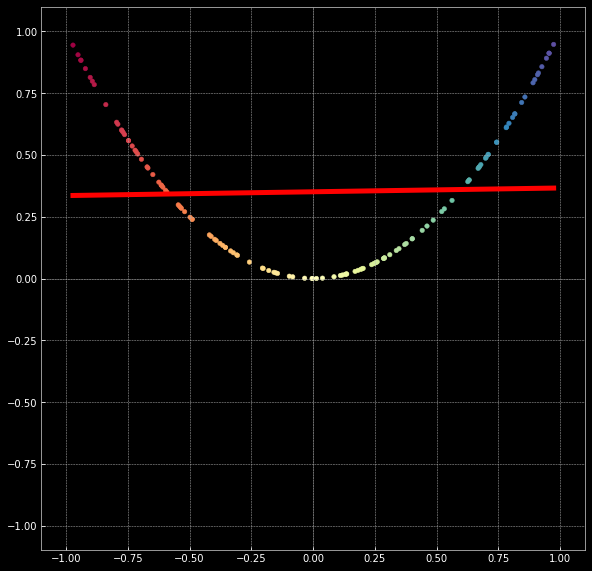

In [33]:
# Plot predictions vs actual data
colors = x_quadr[:, 0]
plot_data(xy_concat(x_quadr, y_quadr), colors)
X, y = xy_to_X_y(x_quadr, y_pred)
plt.plot(X, y, 'r-', lw=5);

In [34]:
# Define model
model_0H = Linear_0H().to(device)

In [35]:
# Train model on cubic data for 10000 epochs and loss_threshold=1e-2
y_pred = train(model_0H, epochs=10000, x=x_cubic, y=y_cubic, loss_threshold=1e-2)

Epoch 1 loss: 0.3365343511104584
Epoch 1000 loss: 0.021106980741024017
Epoch 2000 loss: 0.021106980741024017
Epoch 3000 loss: 0.021106980741024017
Epoch 4000 loss: 0.021106980741024017
Epoch 5000 loss: 0.021106980741024017
Epoch 6000 loss: 0.021106980741024017
Epoch 7000 loss: 0.021106980741024017
Epoch 8000 loss: 0.021106980741024017
Epoch 9000 loss: 0.021106980741024017
Epoch 10000 loss: 0.021106980741024017


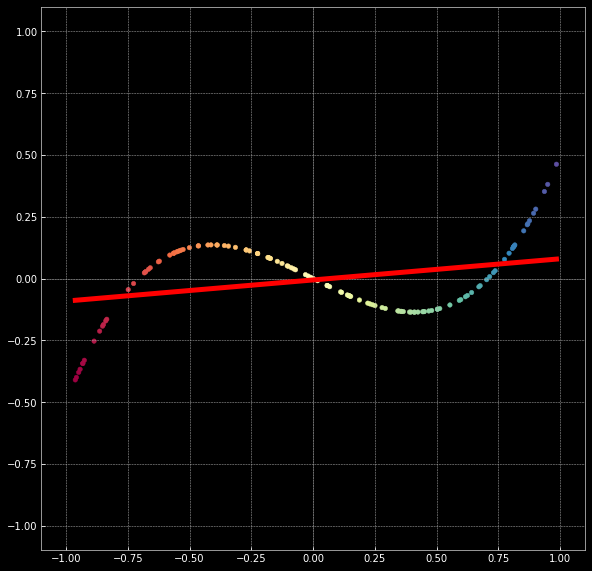

In [36]:
# Plot predictions vs actual data
colors = x_cubic[:, 0]
plot_data(xy_concat(x_cubic, y_cubic), colors)
X, y = xy_to_X_y(x_cubic, y_pred)
plt.plot(X, y, 'r-', lw=5);

In [37]:
# Define model
model_0H = Linear_0H().to(device)

In [38]:
# Train model on sine data for 10000 epochs and loss_threshold=1e-2
y_pred = train(model_0H, epochs=10000, x=x_sine, y=y_sine, loss_threshold=1e-2)

Epoch 1 loss: 0.6671091318130493
Epoch 1000 loss: 0.07579747587442398
Epoch 2000 loss: 0.07579747587442398
Epoch 3000 loss: 0.07579747587442398
Epoch 4000 loss: 0.07579747587442398
Epoch 5000 loss: 0.07579747587442398
Epoch 6000 loss: 0.07579747587442398
Epoch 7000 loss: 0.07579747587442398
Epoch 8000 loss: 0.07579747587442398
Epoch 9000 loss: 0.07579747587442398
Epoch 10000 loss: 0.07579747587442398


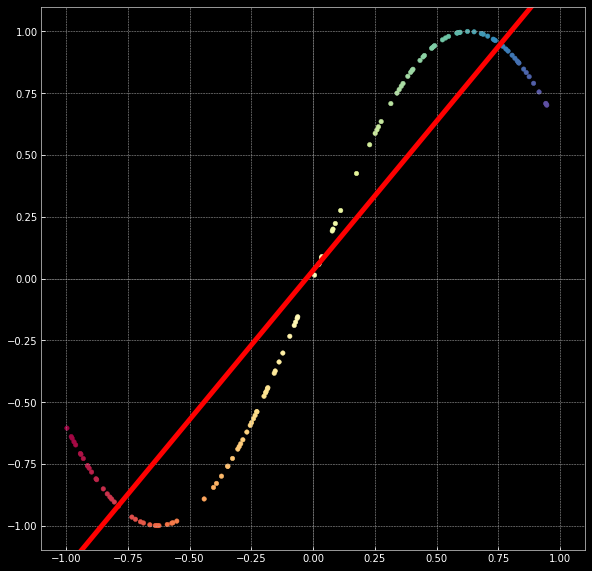

In [39]:
# Plot predictions vs actual data
colors = x_sine[:, 0]
plot_data(xy_concat(x_sine, y_sine), colors)
X, y = xy_to_X_y(x_sine, y_pred)
plt.plot(X, y, 'r-', lw=5)

In [40]:
# Define model
model_0H = Linear_0H().to(device)

In [41]:
# Train model on abosulte value data for 10000 epochs and loss_threshold 1e-2
y_pred = train(model_0H, epochs=10000, x=x_abs, y=y_abs, loss_threshold=1e-2)

Epoch 1 loss: 0.5330982208251953
Epoch 1000 loss: 0.07780542969703674
Epoch 2000 loss: 0.07780542969703674
Epoch 3000 loss: 0.07780542969703674
Epoch 4000 loss: 0.07780542969703674
Epoch 5000 loss: 0.07780542969703674
Epoch 6000 loss: 0.07780542969703674
Epoch 7000 loss: 0.07780542969703674
Epoch 8000 loss: 0.07780542969703674
Epoch 9000 loss: 0.07780542969703674
Epoch 10000 loss: 0.07780542969703674


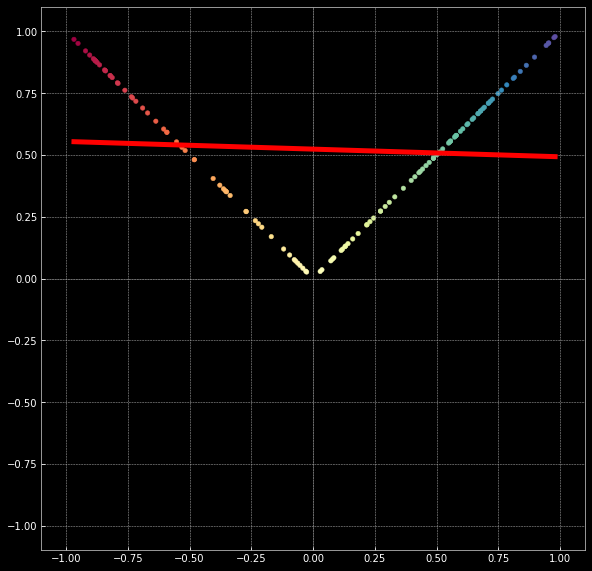

In [42]:
# Plot predictions vs actual data
colors = x_abs[:, 0]
plot_data(xy_concat(x_abs, y_abs), colors)
X, y = xy_to_X_y(x_abs, y_pred)
plt.plot(X, y, 'r-', lw=5)

In [43]:
# Define model
model_0H = Linear_0H().to(device)

In [44]:
# Train model on Heavyside Step Function data for 10000 epochs and loss_threshold 1e-2
y_pred = train(model_0H, epochs=10000, x=x_hs, y=y_hs, loss_threshold=1e-2)

Epoch 1 loss: 0.4656562805175781
Epoch 1000 loss: 0.05697515606880188
Epoch 2000 loss: 0.05697515606880188
Epoch 3000 loss: 0.05697515606880188
Epoch 4000 loss: 0.05697515606880188
Epoch 5000 loss: 0.05697515606880188
Epoch 6000 loss: 0.05697515606880188
Epoch 7000 loss: 0.05697515606880188
Epoch 8000 loss: 0.05697515606880188
Epoch 9000 loss: 0.05697515606880188
Epoch 10000 loss: 0.05697515606880188


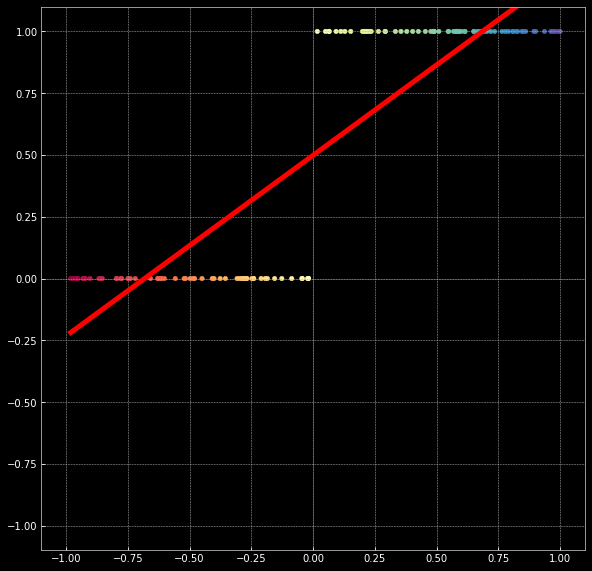

In [45]:
# Plot predictions vs actual data
colors = x_hs[:, 0]
plot_data(xy_concat(x_hs, y_hs), colors)
X, y = xy_to_X_y(x_hs, y_pred)
plt.plot(X, y, 'r-', lw=5)

### 3.3. `Linear_1H`

In [46]:
# Define model
model_1H = Linear_1H().to(device)

In [47]:
# Train model on quadratic data for 10000 epochs and loss threshold 1e-2
y_pred = train(model_1H, epochs=10000, x=x_quadr, y=y_quadr, loss_threshold=1e-2)

Epoch 1 loss: 0.21722716093063354
********************
Epoch 273 loss: 0.009453614242374897


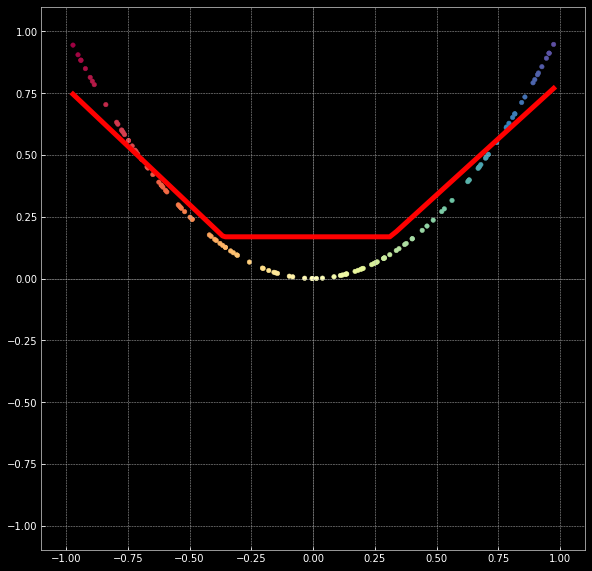

In [48]:
# Plot predictions vs actual data
colors = x_quadr[:, 0]
plot_data(xy_concat(x_quadr, y_quadr), colors)
X, y = xy_to_X_y(x_quadr, y_pred)
plt.plot(X, y, 'r-', lw=5);

In [49]:
# Define model
model_1H = Linear_1H().to(device)

In [50]:
# Train model on cubic data for 10000 epochs and loss_threshold 1e-2
y_pred = train(model_1H, epochs=10000, x=x_cubic, y=y_cubic, loss_threshold=1e-2)

Epoch 1 loss: 0.04811142757534981
********************
Epoch 80 loss: 0.009954266250133514


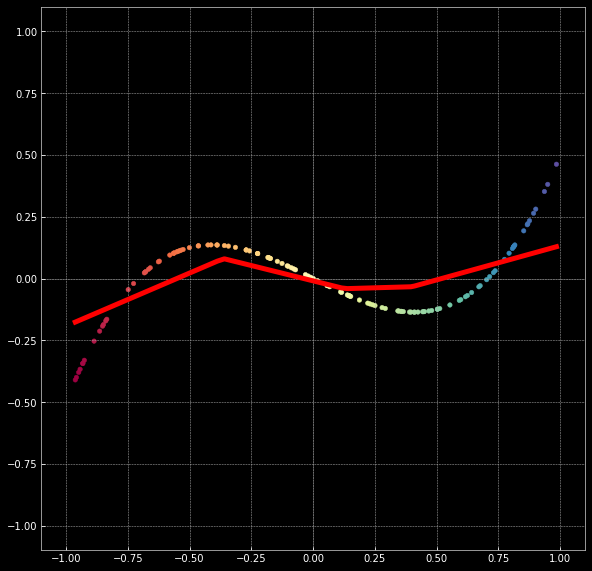

In [51]:
# Plot predictions vs actual data
colors = x_cubic[:, 0]
plot_data(xy_concat(x_cubic, y_cubic), colors)
X, y = xy_to_X_y(x_cubic, y_pred)
plt.plot(X, y, 'r-', lw=5);

In [52]:
# Define model
model_1H = Linear_1H().to(device)

In [53]:
# Train model on sine data for 10000 epochs and loss_threshold 1e-2
y_pred = train(model_1H, epochs=10000, x=x_sine, y=y_sine, loss_threshold=1e-2)

Epoch 1 loss: 0.5705702900886536
********************
Epoch 198 loss: 0.00992500688880682


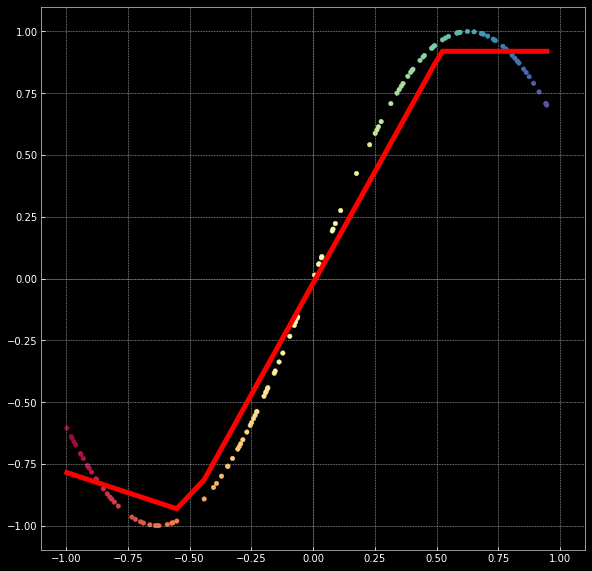

In [54]:
# Plot predictions vs actual data
colors = x_sine[:, 0]
plot_data(xy_concat(x_sine, y_sine), colors)
X, y = xy_to_X_y(x_sine, y_pred)
plt.plot(X, y, 'r-', lw=5);

In [55]:
# Define model
model_1H = Linear_1H().to(device)

In [56]:
# Train model on abosulte value data for 10000 epochs and loss_threshold 1e-2
y_pred = train(model_1H, epochs=10000, x=x_abs, y=y_abs, loss_threshold=1e-2)

Epoch 1 loss: 0.6397567987442017
********************
Epoch 57 loss: 0.009834138676524162


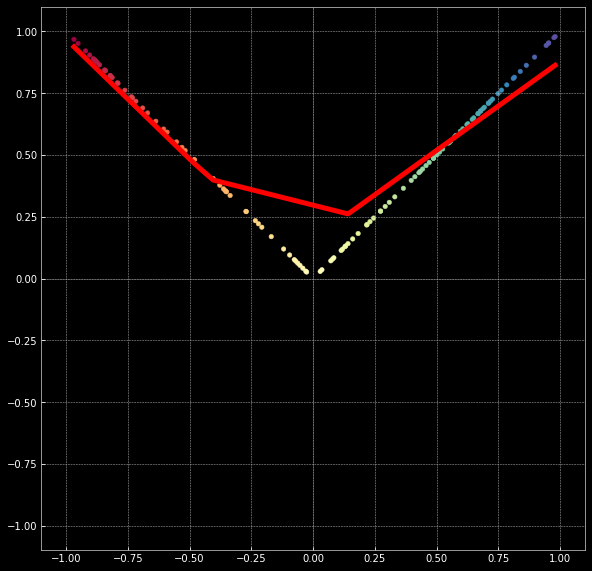

In [57]:
# Plot predictions vs actual data
colors = x_abs[:, 0]
plot_data(xy_concat(x_abs, y_abs), colors)
X, y = xy_to_X_y(x_abs, y_pred)
plt.plot(X, y, 'r-', lw=5);

In [58]:
# Define model
model_1H = Linear_1H().to(device)

In [59]:
# Train model on Heavyside Step Function data for 10000 epochs and loss_threshold 1e-2
y_pred = train(model_1H, epochs=10000, x=x_hs, y=y_hs, loss_threshold=1e-2)

Epoch 1 loss: 0.20919395983219147
********************
Epoch 860 loss: 0.009996955282986164


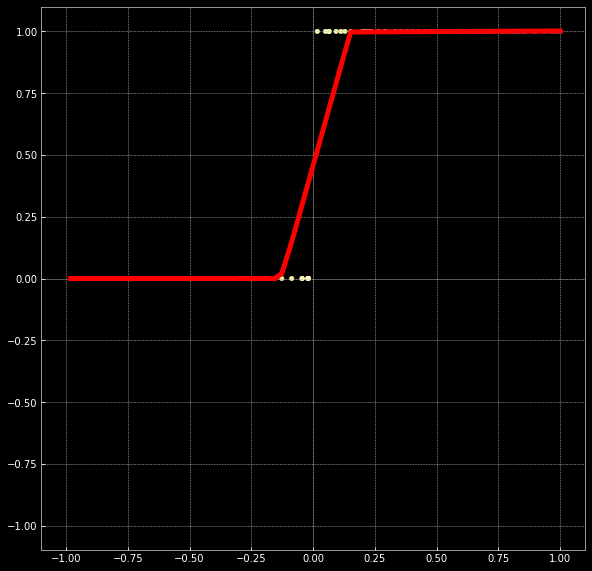

In [60]:
# Plot predictions vs actual data
colors = x_hs[:, 0]
plot_data(xy_concat(x_hs, y_hs), colors)
X, y = xy_to_X_y(x_hs, y_pred)
plt.plot(X, y, 'r-', lw=5);

### 3.3. `Linear_2H`

In [61]:
# Define model
model_2H = Linear_2H().to(device)

In [62]:
# Train model on quadratic data for 10000 epochs and loss_threshold 1e-2
y_pred = train(model_2H, epochs=10000, x=x_quadr, y=y_quadr, loss_threshold=1e-2)

Epoch 1 loss: 1.4042054414749146
Epoch 1000 loss: 0.05116254836320877
********************
Epoch 1603 loss: 0.0094557274132967


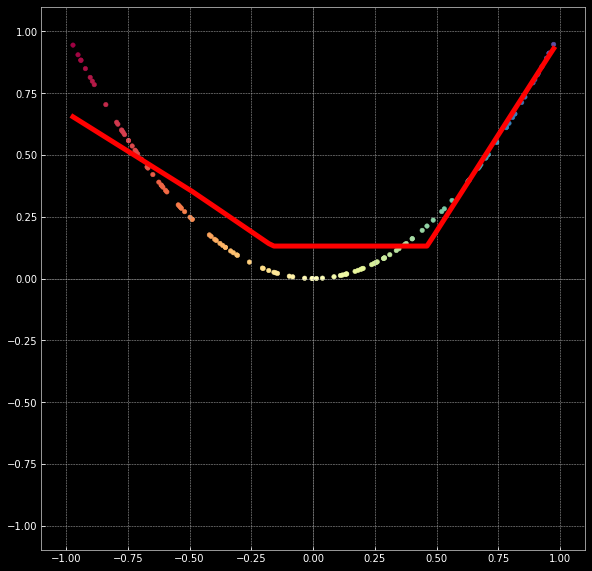

In [63]:
# Plot predictions vs actual data
colors = x_quadr[:, 0]
plot_data(xy_concat(x_quadr, y_quadr), colors)
X, y = xy_to_X_y(x_quadr, y_pred)
plt.plot(X, y, 'r-', lw=5);

In [64]:
# Define model
model_2H = Linear_2H().to(device)

In [65]:
# Train model on cubic data for 10000 epochs and loss_threshold 1e-2
y_pred = train(model_2H, epochs=10000, x=x_cubic, y=y_cubic, loss_threshold=1e-2)

Epoch 1 loss: 0.055934835225343704
********************
Epoch 88 loss: 0.009940741583704948


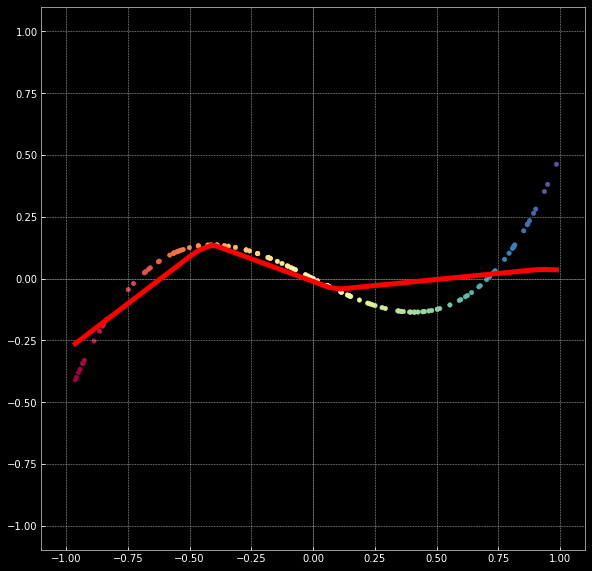

In [66]:
# Plot predictions vs actual data
colors = x_cubic[:, 0]
plot_data(xy_concat(x_cubic, y_cubic), colors)
X, y = xy_to_X_y(x_cubic, y_pred)
plt.plot(X, y, 'r-', lw=5);

In [67]:
# Define model
model_2H = Linear_2H().to(device)

In [68]:
# Train model on sine data for 10000 epochs and loss_threshold 1e-2
y_pred = train(model_2H, epochs=10000, x=x_sine, y=y_sine, loss_threshold=1e-2)

Epoch 1 loss: 0.8337273001670837
********************
Epoch 335 loss: 0.009995609521865845


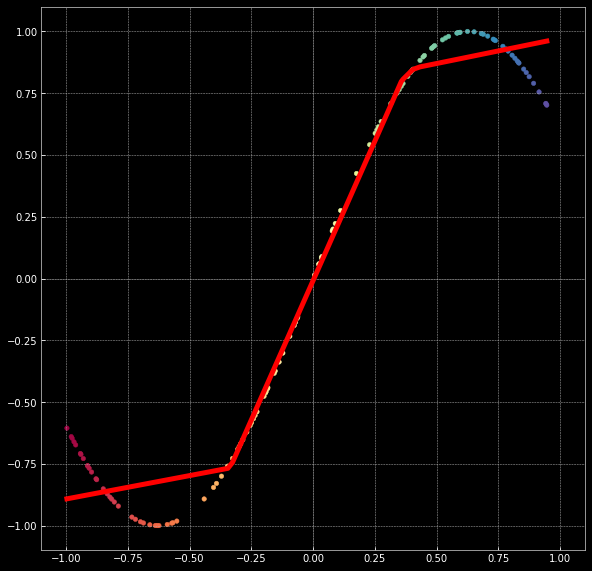

In [69]:
# Plot predictions vs actual data
colors = x_sine[:, 0]
plot_data(xy_concat(x_sine, y_sine), colors)
X, y = xy_to_X_y(x_sine, y_pred)
plt.plot(X, y, 'r-', lw=5);

In [70]:
# Define model
model_2H = Linear_2H().to(device)

In [71]:
# Train model on abosulte value data for 10000 epochs and loss_threshold=1e-2
y_pred = train(model_2H, epochs=10000, x=x_abs, y=y_abs, loss_threshold=1e-2)

Epoch 1 loss: 0.10965890437364578
********************
Epoch 94 loss: 0.009479492902755737


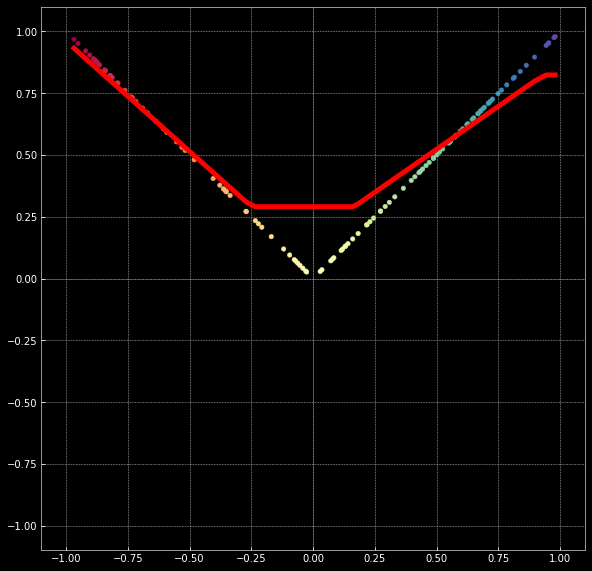

In [72]:
# Plot predictions vs actual data
colors = x_abs[:, 0]
plot_data(xy_concat(x_abs, y_abs), colors)
X, y = xy_to_X_y(x_abs, y_pred)
plt.plot(X, y, 'r-', lw=5);

In [73]:
# Define model
model_2H = Linear_2H().to(device)

In [74]:
# Train model on Heavyside Step Function data for 10000 epochs and loss_threshold 1e-2
y_pred = train(model_2H, epochs=10000, x=x_hs, y=y_hs, loss_threshold=1e-2)

Epoch 1 loss: 0.28437933325767517
********************
Epoch 187 loss: 0.00993945449590683


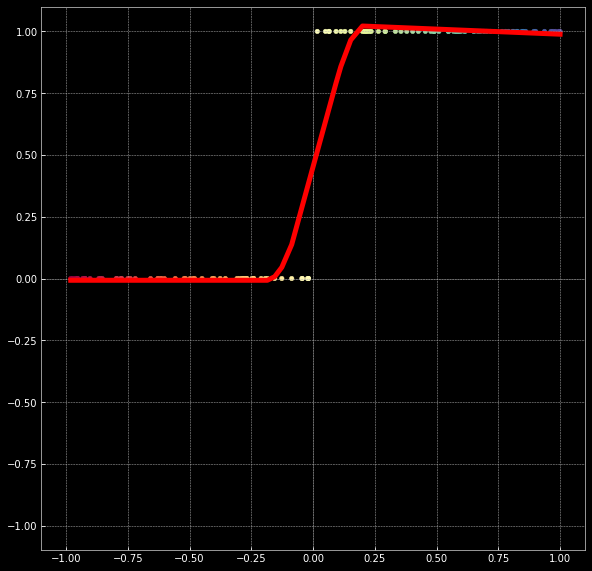

In [75]:
# Plot predictions vs actual data
colors = x_hs[:, 0]
plot_data(xy_concat(x_hs, y_hs), colors)
X, y = xy_to_X_y(x_hs, y_pred)
plt.plot(X, y, 'r-', lw=5);

### 3.4. Which of the models stopped early and on what data?
Please list the experiments where the `loss_threshold` of 1e-2 was reached early. 

# Using more layers provides a better approximation of the underlying function using piecewise functions.
# I tried various parameters for SGD the best results were obtained with Adam.
# I could also have done a grid search for the hyperparameters related to SGD or Adam.

List: 
+ (Linear_1H, quadratic)
+ (Linear_1H, cubic)
+ (Linear_1H, sine)
+ (Linear_1H, absolute_value)
+ (Linear_1H, heaviside)
+ (Linear_2H, quadratic)
+ (Linear_2H, cubic)
+ (Linear_2H, sine)
+ (Linear_2H, absolute_value)
+ (Linear_2H, heaviside)